In [578]:
import numpy as np
import matplotlib.pyplot as plt

**RNN without learning**

In this Notebook, we will explore RNN in Neuroscience without learning. The following equation will be use :

$\mathbf{F(x)} = -\vec{x} + \sigma[\mathbf{W}\vec{x}-\mu]$

Where $\sigma$ is the sigmoid function : $\sigma(x) = \frac{1}{(1+e^{-x})}$.

To solve those differentials equations, we will use Runge Kutta of fourth order. NUMBA will also be added to reduce our computation time.

In [344]:
def dydx(t,x,W, sigma, mu):
    return -x + sigma(W @ x - mu)

def RNN(t, IC, dydx, W, sigma=lambda x: ((1+np.exp(-x))**(-1)), mu=0):
    '''Approximate differential equation with RK methods for matrices
    -----------------------
    t : time array (np.linspace)
    IC : initial condition (in array -> line)
    dydx : Function
    W : Weight matrix
    sigma : Activation function (sigmoid if unspecified)
    mu : Activation threshold (0 if unspecified)
    ----------------------
    '''
    n = len(IC)
    m = len(t)
    res = np.zeros((m, n))   #mxn matrix that contain our values
    res[0] = IC  # First line is redefine
    dt = (t[-1] - t[0])/m
    for i in range(1, m):
        k1 = dt * dydx(t[i-1], res[(i-1)], W=W, sigma=sigma, mu=mu)
        k2 = dt * dydx(t[i-1] + 0.5 * dt, res[(i-1)] + 0.5 * k1, W=W, sigma=sigma, mu=mu)
        k3 = dt * dydx(t[i-1] + 0.5 * dt, res[(i-1)] + 0.5 * k2, W=W, sigma=sigma, mu=mu)
        k4 = dt * dydx(t[i-1] + dt, res[(i-1)] + k3, W=W, sigma=sigma, mu=mu)
        res[i] = res[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return res

Let's take a simple example with 2 neurons. We therefore have a $2\times 2$ matrix. We will use a small matrix threshold $\mu$. Therefore, it is easier for our neurons to be in an active state. Our initials conditions begin at a random position between 0 and 1. Finally, our $2\times 2$ will be build with only positive weight. We therefore expect the model to converge to 1 or close. If $\mu$ is big, than our neurons can't activate and then we convert to 0.

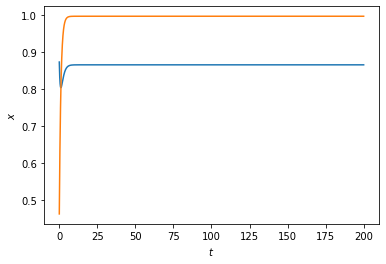

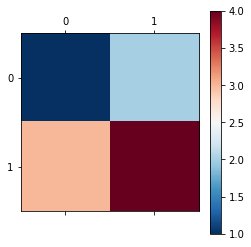

In [373]:
t = np.linspace(0, 200, 4000)
n = 2
IC = np.random.rand(n)
W = np.random.randn(n, n)
W = np.array([[1, 2],[3, 4]])

x = RNN(t=t, IC=IC, W=W, dydx=dydx, mu=1)

plt.plot(t, x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.show()
plt.matshow(W, cmap="RdBu_r")
plt.colorbar()

We can improve our model by working with a $100 \times 100$ matrix. By creating a random matrix arround with an average of 0 and a standard deviation of 80. Since our standard deviation is really big and our $\mu$ is small, we can obtain chaotic behavior. This occur when we have a major variation between our weights. Here, we obtains what appears to be chaotic but then converge!

C:\Users\antho\AppData\Local\Temp/ipykernel_6172/2018726646.py:4: RuntimeWarning: overflow encountered in exp
  def RNN(t, IC, dydx, W, sigma=lambda x: ((1+np.exp(-x))**(-1)), mu=0):


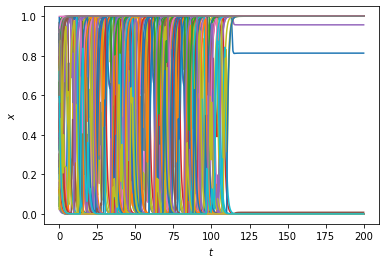

In [582]:
t = np.linspace(0, 200, 4000)
n = 100
IC = np.random.rand(n)
W = 100 * np.random.randn(n, n)

x = RNN(t=t, IC=IC, W=W, dydx=dydx, mu=1)

plt.plot(t, x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.show()


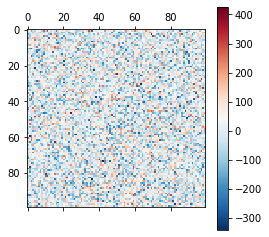

In [390]:
plt.matshow(W, cmap="RdBu_r")
plt.colorbar()

With a smaller standard deviation, we can obtain a more periodic behavior :

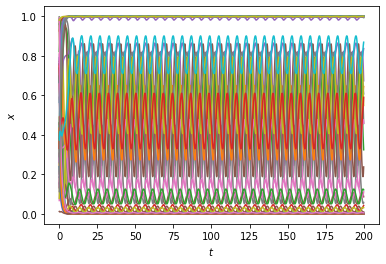

In [430]:
t = np.linspace(0, 200, 4000)
n = 50
IC = np.random.rand(n)
W = 2 * np.random.randn(n, n)

x = RNN(t=t, IC=IC, W=W, dydx=dydx, mu=1)

plt.plot(t, x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.show()


However, if those variation between our weights are not equal (meaning we have more excitation that inhibition for example), then our behavior tends to be damp and converge.

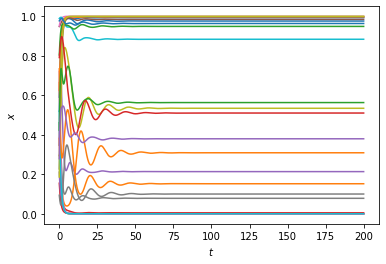

In [437]:
t = np.linspace(0, 200, 4000)
n = 25
IC = np.random.rand(n)
W = 2 * np.random.randn(n, n)

x = RNN(t=t, IC=IC, W=W, dydx=dydx, mu=1)

plt.plot(t, x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.show()

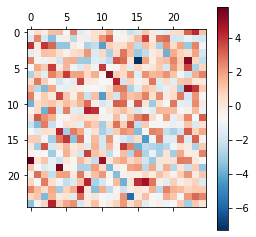

In [441]:
plt.matshow(W, cmap="RdBu_r")
plt.colorbar()
plt.show()

Now, let's work with a "special" case. Here, we have oscillation and convergence. The way our weights matrix was built allowed us to have a certain region of the brain that is more connected and active than an other.

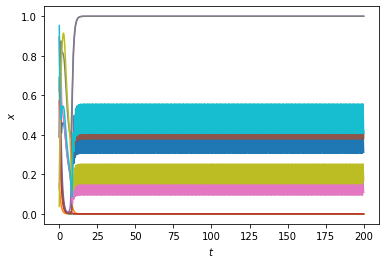

In [493]:
t = np.linspace(0, 200, 4000)
n = 10
IC = np.random.rand(n)
W = 20 * np.random.randn(n, n)

x = RNN(t=t, IC=IC, W=W, dydx=dydx, mu=1)

plt.plot(t, x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.show()

We can have our matrix from the previous example:

In [625]:
B = np.array([[-18.03198727,  20.29254413,  -5.37386381,  31.99593609,
        -4.03013242,  20.60881536, -25.15158607,  -5.01737321,
        18.146391  ,  12.28126922],[ -6.99125401,   5.52013115,  -6.08046266,  -4.44582438,
        -6.93362069,   0.46836447,   1.2265977 ,   9.22713019,
         1.1664401 , -33.67744367],[ -5.51557048,  15.55961163, -20.79464786,  -9.03900669,
       -18.61620008,   4.40590381, -36.56090287, -24.69892172,
        10.12544996,   4.56647575],[ 10.558425  ,  22.10643565,  -8.10299178, -28.31571649,
       -42.97311159,  -6.66126223,  -7.90716664,  -0.59651245,
        -1.3735424 ,  -8.7478415 ],[  1.66565545,  36.32460513,  -8.10510491, -30.75458526,
       -10.96268587,  10.50066376,  11.67386654,  23.10839895,
       -35.43618869,   2.87891468],[-26.13713286, -15.97825156,  13.55992758, -11.62300062,
         0.86531563,   9.69950453, -21.20797926,  15.75485517,
       -22.57596878,  -8.01014846],[ 37.05589002, -24.89023235,  28.55211399,  11.79964816,
       -27.65187102,  38.13540822, -26.84292149,  -2.46974324,
        -4.1276351 ,   1.84991411],[ 24.10493281, -15.17279843, -23.93868742,  20.93024389,
        19.23399951, -11.23083895,  -6.82827828, -13.03265398,
       -11.40368392,  27.19575531],[ -0.29883931,   2.85151284, -12.69423569,  13.32520598,
        -5.6176515 ,  36.57376048,  22.82576368, -14.84197049,
         5.38698597,  -3.90612443], [  2.21776798,  12.40118067, -20.1500902 ,   1.56698663,
         3.45162008,  39.51463665,  -7.59931957, -15.13851711,
        29.29663945, -23.5145894 ]])

-105.22107606


We can use our matrix from the previous example to showcase how our $\mu$ affects our different behaviors : 

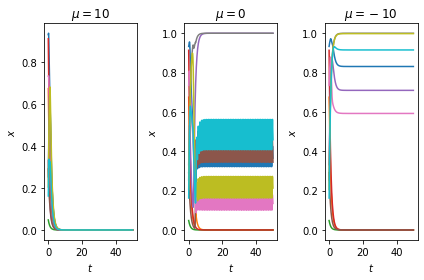

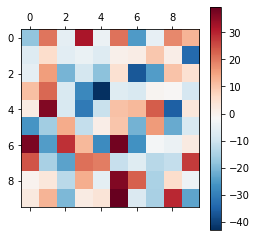

In [543]:
t = np.linspace(0, 50, 4000)
n = 10
IC = np.random.rand(n)
W = B

plt.figure(1)

plt.subplot(131)
plt.plot(t, RNN(t=t, IC=IC, W=W, dydx=dydx, mu=10))
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.title(r"$\mu = 10$")
plt.tight_layout()
plt.subplot(132)
plt.plot(t, RNN(t=t, IC=IC, W=W, dydx=dydx, mu=0))
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.title(r"$\mu = 0$")
plt.tight_layout()
plt.subplot(133)
plt.plot(t, RNN(t=t, IC=IC, W=W, dydx=dydx, mu=-10))
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.title(r"$\mu = -10$")
plt.tight_layout()
plt.matshow(W, cmap="RdBu_r")
plt.colorbar()
plt.show()

By using $\mu$ as a vector (hence $\vec{\mu}$), we can have a different threshold for each neurons. By doing so, we can have a different convergence (or fix point) for each neurons. 

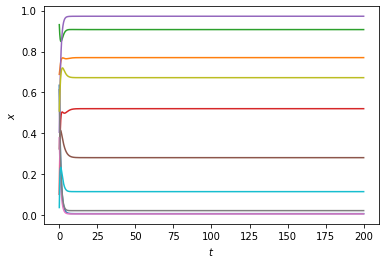

In [622]:
t = np.linspace(0, 200, 4000)
n = 10
IC = np.random.rand(n)
W = np.random.randn(n, n)
mu = np.random.rand(n)

x = RNN(t=t, IC=IC, W=W, dydx=dydx, mu=mu)

plt.plot(t, x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.show()

Finally, using $\vec{u}$ as a vector allows us to obtain more complex behavior such as this one :

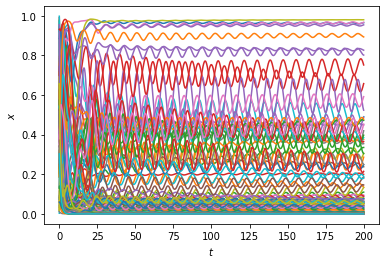

In [596]:
t = np.linspace(0, 200, 4000)
n = 100
IC = np.random.rand(n)
W = np.random.randn(n, n)
mu = 5 * np.random.rand(n)

x = RNN(t=t, IC=IC, W=W, dydx=dydx, mu=mu)

plt.plot(t, x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.show()

C:\Users\antho\AppData\Local\Temp/ipykernel_6172/2018726646.py:4: RuntimeWarning: overflow encountered in exp
  def RNN(t, IC, dydx, W, sigma=lambda x: ((1+np.exp(-x))**(-1)), mu=0):


-5477.934498569441


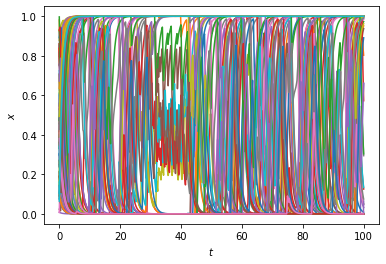

In [637]:
t = np.linspace(0, 100, 4000)
n = 100
IC = np.random.rand(n)
W = 80 * np.random.randn(n, n)
mu = np.random.randn(n)

x = RNN(t=t, IC=IC, W=W, dydx=dydx, mu=mu)
print(sum(sum(W)))

plt.plot(t, x)
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.show()